**Loading Data**

In [390]:
import numpy as np
import pandas as pd

cards = pd.read_csv('/content/drive/MyDrive/DL-Assignments/creditcard.csv')

**Getting Idea of Data**

In [391]:
cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [392]:
cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Checking Missing Vlaues

In [393]:
cards.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

**Preprocessing and Preparation**

In [394]:
#Separating classes of Whole Data

df0 = cards[cards.Class==0]
df1 = cards[cards.Class==1]

In [395]:
#getting idea of separated data with whole data

print(len(df0))
print(len(df1))
len(df1)/len(cards)

284315
492


0.001727485630620034

In [396]:
#Sampling data from non-fraudlent because it was too large as compared to fraudlent

df0 = df0.sample(frac=0.0025)
print(len(df1))

492


In [397]:
#Now seeing the percentage of data after sampling

print(len(df0)/len(cards))
print(len(df0))

0.002496427405225293
711


In [398]:
#Making whole new dataframe for further process

preprocessedData = df0.append(df1 , ignore_index=True)

In [399]:
preprocessedData.shape

(1203, 31)

In [400]:
preprocessedData

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,46382.0,-0.346721,0.827116,1.673164,-0.043269,-0.084908,-0.867797,0.877591,-0.218726,-0.062627,-0.077409,-0.528887,-0.819967,-1.259585,0.187391,1.018757,0.179659,-0.427204,-0.216266,0.023825,0.123539,-0.284694,-0.674178,-0.007308,0.324192,-0.256051,0.046779,0.087671,-0.103603,19.78,0
1,144462.0,2.021801,-0.106720,-1.267169,0.283239,-0.096971,-1.117097,0.105658,-0.221166,0.449853,0.206756,0.952892,0.598318,-0.822990,0.846889,0.119802,-0.010340,-0.674714,0.496813,0.027610,-0.285973,0.294525,0.940392,0.007451,0.093304,0.198634,-0.131361,-0.028648,-0.069369,2.69,0
2,69473.0,1.113833,-0.028021,1.507840,1.471879,-1.258555,-0.515834,-0.556077,0.062753,0.875759,-0.198725,-0.336099,0.586749,-0.195866,-0.300277,0.153518,-0.071591,-0.046058,-0.220345,-0.411830,-0.159268,-0.028448,0.114437,0.062100,0.911978,0.338678,-0.441271,0.072259,0.043431,9.99,0
3,87845.0,-0.318150,1.020918,-1.772508,-2.399598,0.639547,-0.221973,-0.269924,-4.606361,-0.202184,-1.429198,0.824535,1.808592,0.154762,1.062007,-1.930714,-0.073495,-0.563086,-0.531653,-0.984749,0.003292,0.461450,0.545955,-0.120605,0.802896,0.567045,0.567253,0.175566,0.295330,80.00,0
4,170240.0,0.091141,0.906128,0.020146,-0.754753,0.816059,-0.707963,1.060083,-0.212353,-0.127105,-0.436183,-1.398809,0.364485,0.987458,-0.099355,-0.446590,0.068403,-0.708829,-0.627474,0.170439,0.041483,-0.295325,-0.628630,-0.022857,-0.638368,-0.367513,0.178233,0.251394,0.092349,4.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
1199,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
1200,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
1201,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [401]:
labels = preprocessedData.iloc[:, -1]

In [402]:
preprocessedData = preprocessedData.iloc[: , 0:-1]

In [403]:
preprocessedData.shape

(1203, 30)

In [404]:
#Standrization

preprocessedData -= preprocessedData.mean()
preprocessedData /= preprocessedData.std()

In [405]:
#splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preprocessedData, labels, test_size=0.3, random_state=2)

In [406]:
#Confirming the data and its respective targets

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(842, 30)
(361, 30)
(842,)
(361,)


In [407]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [408]:
from tensorflow.keras import optimizers

model.compile(optimizer = 'RMSprop', loss='binary_crossentropy', metrics=['accuracy'])

In [409]:
history = model.fit(X_train, y_train, validation_split=0.21, epochs= 100, batch_size = 35)

Epoch 1/100
19/19 [==============================] - 1s 14ms/step - loss: 0.6962 - accuracy: 0.5483 - val_loss: 0.6873 - val_accuracy: 0.5876
Epoch 2/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6825 - accuracy: 0.6754 - val_loss: 0.6710 - val_accuracy: 0.6949
Epoch 3/100
19/19 [==============================] - 0s 3ms/step - loss: 0.6648 - accuracy: 0.7452 - val_loss: 0.6307 - val_accuracy: 0.8362
Epoch 4/100
19/19 [==============================] - 0s 4ms/step - loss: 0.6336 - accuracy: 0.8078 - val_loss: 0.5741 - val_accuracy: 0.8701
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.8825 - val_loss: 0.5253 - val_accuracy: 0.8927
Epoch 6/100
19/19 [==============================] - 0s 3ms/step - loss: 0.5384 - accuracy: 0.9058 - val_loss: 0.4870 - val_accuracy: 0.9096
Epoch 7/100
19/19 [==============================] - 0s 4ms/step - loss: 0.5085 - accuracy: 0.9226 - val_loss: 0.4571 - val_accuracy: 0.8983
Epoch 8/100


In [410]:
import matplotlib.pyplot as plt

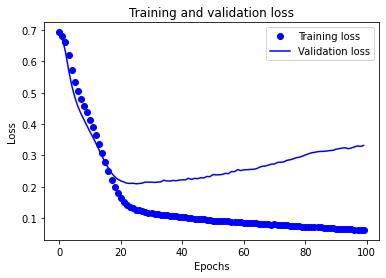

In [411]:

loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

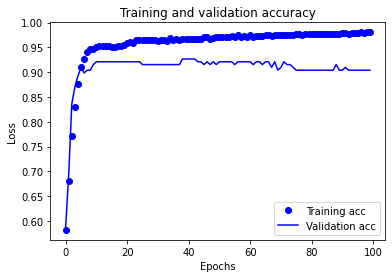

In [412]:
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy is > 92%

In [413]:
test_loss , test_acc = model.evaluate(X_test, y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.2128 - accuracy: 0.9363


In [414]:
predictions=model.predict(X_test).astype(dtype="u8")

In [415]:
#Run this cell once else it may give you error
#Should start and run all cells together to avoid error

#Converting this to numpy array for further procedure

y_test = y_test.to_numpy()

In [416]:
#How much prediction is related by counting true values

TrueValues = (y_test == predictions[: , 0]).sum()

In [417]:
#percentage on prediction

(TrueValues)/(y_test.shape[0])


0.8310249307479224